In [11]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation as animation

In [12]:
%matplotlib notebook

In [23]:
def advec_diffuse(a,dt,T,x=[],u0=[]):
    """Uses a spectral decomposition and forward Euler to solve 
    the 1D advection diffusion equation u_t + au_x = u_xx.
    Assumes the domain is [0,2pi] or else the wavenumbers would need
    to be weighted differently.
    a is the advection speed
    dt is the time-step
    T is the final time we run to
    x is the spatial discretization
    u0 is the initial condition
    
    Because this uses the fft, it is best to have len(x) = 2^K for some integer K"""

    N = len(x)
    #The most difficult part is figuring out how numpy indexes the wavenumbers
    k = np.array([1j*y for y in range(0,int(N/2))] + [0] + [1j*y for y in range(int(-N/2)+1,0)])
    k2 = k**2; #k is actually ik
    u = []
    u.append(u0)
    uhat = np.fft.fft(u0)
    totalStep = int(T/dt)
    for nn in range(totalStep):
        # forward Euler time-stepping
        new_uhat = uhat + dt*(-a*k + k2)*uhat
        uhat = new_uhat.copy()
        # revert back to real values (not necessary unless we want
        # to save our solution in real space)
        u.append(np.real(np.fft.ifft(uhat)))
    return x,u

In [24]:
x=np.linspace(0,2*np.pi,64)
u0 = np.sin(x)
x,u = advec_diffuse(2,.001,100,x=x,u0=u0)

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,2*np.pi))
ax.set_ylim((-1,1))
#ax.set_ylim((-100000,100000))
sol, = plt.plot([],[])

def update(i):
    sol.set_data(x,u[i])
    return sol

ani = animation.FuncAnimation(fig, update, frames=range(100), interval=20)
plt.show()

<IPython.core.display.Javascript object>

In [20]:
def diffusive_burgers(dt,T,x=[],u0=[]):
    """Uses a spectral decomposition and forward Euler to solve 
    the 1D advection diffusion equation u_t + au_x = u_xx.
    Assumes the domain is [0,2pi] or else the wavenumbers would need
    to be weighted differently.
    a is the advection speed
    dt is the time-step
    T is the final time we run to
    x is the spatial discretization
    u0 is the initial condition
    
    Because this uses the fft, it is best to have len(x) = 2^K for some integer K"""

    N = len(x)
    #The most difficult part is figuring out how numpy indexes the wavenumbers
    k = np.array([1j*y for y in range(0,int(N/2))] + [0] + [1j*y for y in range(int(-N/2)+1,0)])
    k2 = k**2;
    u = []
    u.append(u0)
    uhat = np.fft.fft(u0)
    totalStep = int(T/dt)
    for nn in range(totalStep):
        # forward Euler time-stepping
        new_uhat = uhat + dt*(-np.fft.fft(np.fft.ifft(k*uhat)*np.fft.ifft(uhat)) + k2*uhat)
        uhat = new_uhat.copy()
        # revert back to real values (not necessary unless we want
        # to save our solution in real space)
        u.append(np.real(np.fft.ifft(uhat)))
    return x,u

In [21]:
x=np.linspace(0,2*np.pi,128)
u0 = np.sin(x)*np.cos(x**2)+0.5*np.sin(14*x)
x,u = diffusive_burgers(.0001,100,x=x,u0=u0)

<IPython.core.display.Javascript object>


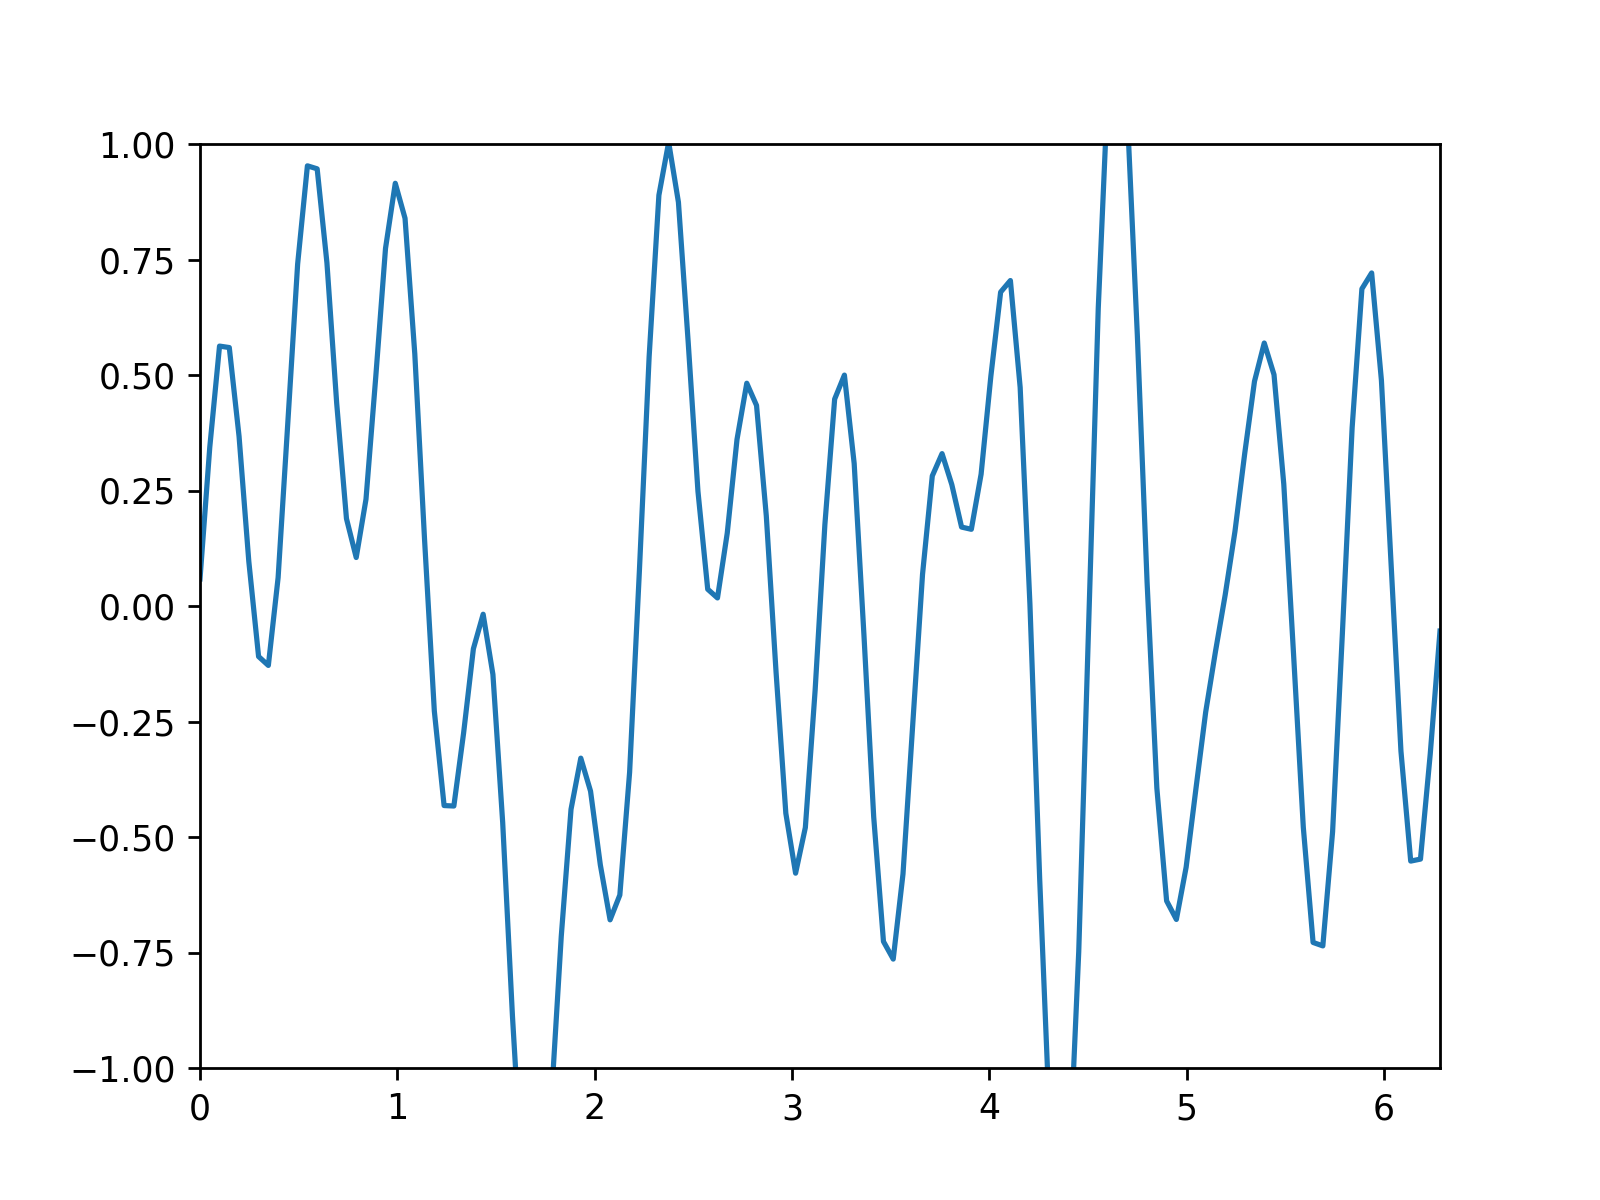

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,2*np.pi))
ax.set_ylim((-1,1))
#ax.set_ylim((-100000,100000))
sol, = plt.plot([],[])

def update(i):
    sol.set_data(x,u[i])
    return sol

ani = animation.FuncAnimation(fig, update, frames=range(100), interval=20)
plt.show()

In [3]:
def KSE(dt,T,x=[],u0=[]):
    """Uses a spectral decomposition and forward Euler to solve 
    the 1D advection diffusion equation u_t + au_x = u_xx.
    Assumes the domain is [0,2pi] or else the wavenumbers would need
    to be weighted differently.
    a is the advection speed
    dt is the time-step
    T is the final time we run to
    x is the spatial discretization
    u0 is the initial condition
    
    Because this uses the fft, it is best to have len(x) = 2^K for some integer K"""

    N = len(x)
    #The most difficult part is figuring out how numpy indexes the wavenumbers
#    k = np.array([1j*y for y in range(0,int(N/2))] + [0] + [1j*y for y in range(int(-N/2)+1,0)])
    k = np.arange(int(N/2)+1)/16
    k2 = k**2;
    u = []
    u.append(u0)
    uhat = np.fft.rfft(u0)
    totalStep = int(T/dt)
    for nn in range(totalStep):
        # forward Euler time-stepping
        #new_uhat = uhat + dt*(-.5*k*np.fft.fft(np.fft.ifft(uhat)**2) - k2*uhat - k2*k2*uhat)
        u_dummy = np.fft.irfft(uhat)
        new_uhat = uhat + dt*(-.5*1j*k*np.fft.rfft(u_dummy**2,axis=-1) + k2*uhat - k2*k2*uhat)
        uhat = new_uhat.copy()
        # revert back to real values (not necessary unless we want
        # to save our solution in real space)
        u.append(np.real(np.fft.irfft(uhat)))
    return x,u

In [4]:
x=np.linspace(-16,16,256)
u0 = np.sin(x)+np.cos(5*x)
x,u = KSE(.000000001,.02,x=x,u0=u0)

<IPython.core.display.Javascript object>


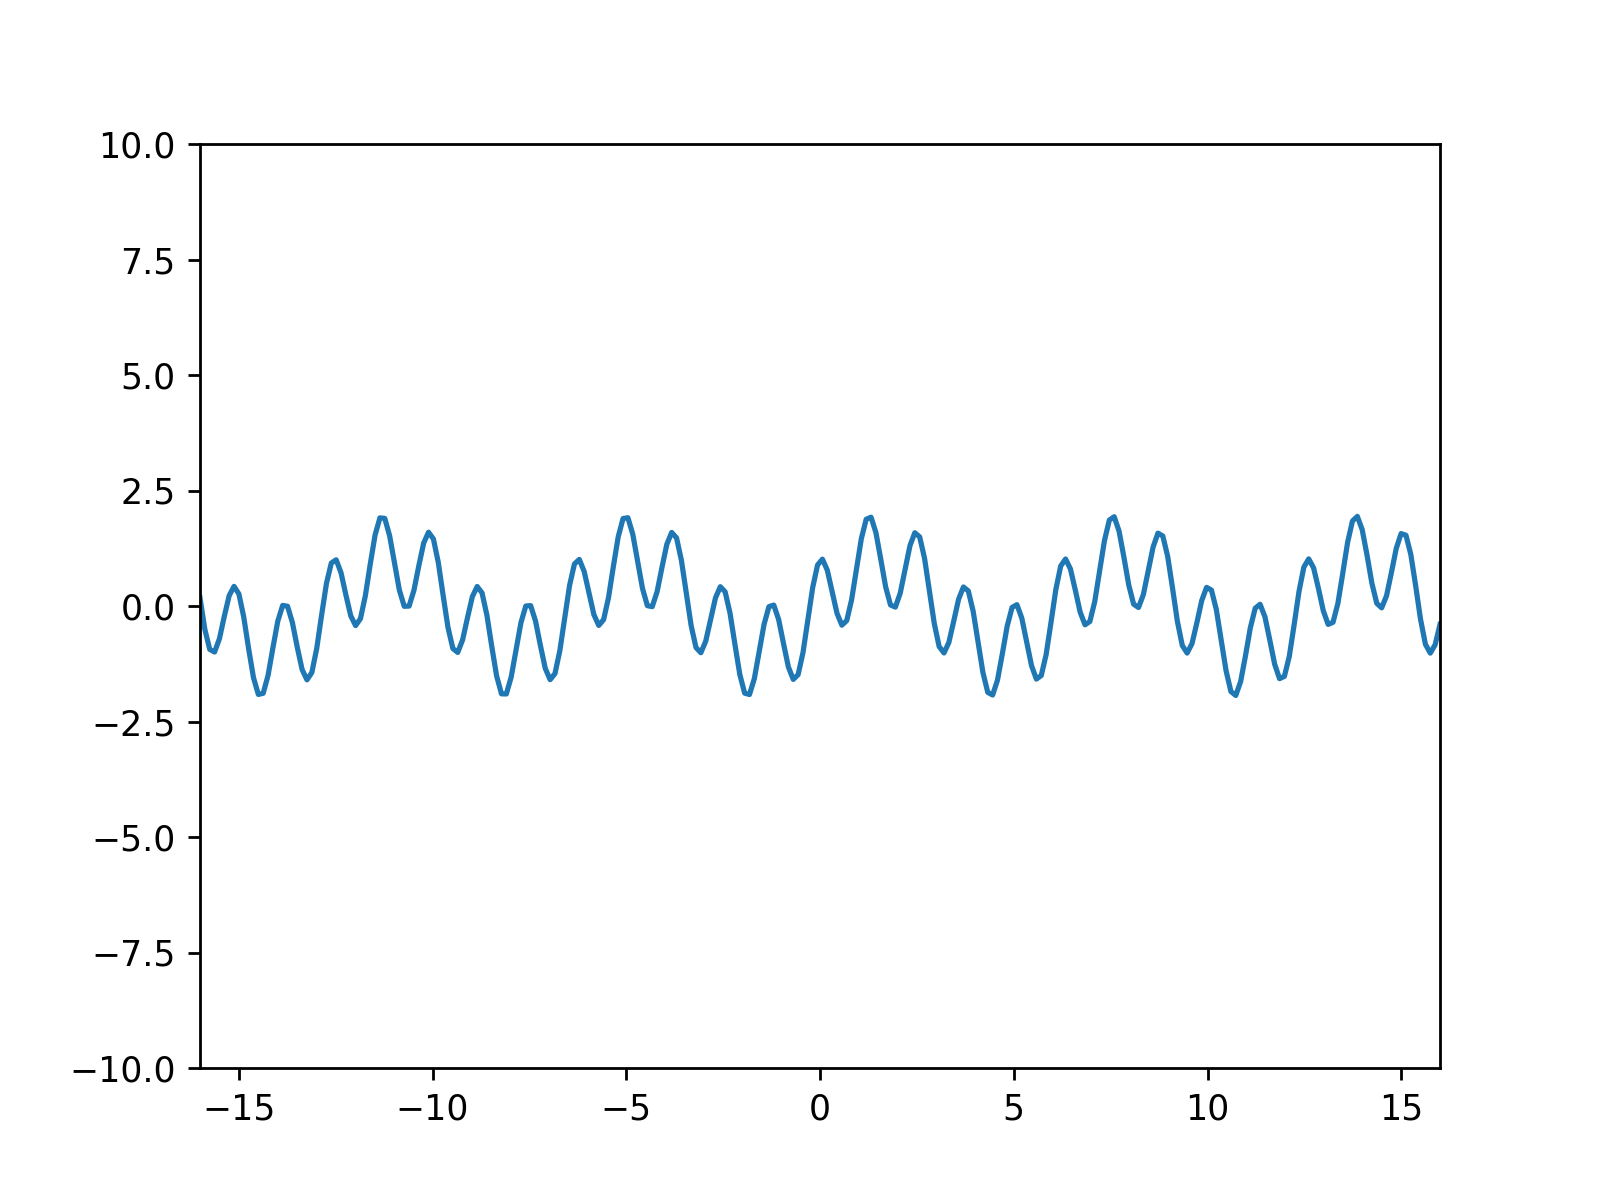

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((-16,16))
ax.set_ylim((-10,10))
#ax.set_ylim((-100000,100000))
sol, = plt.plot([],[])

def update(i):
    sol.set_data(x,u[i])
    return sol

ani = animation.FuncAnimation(fig, update, frames=range(100), interval=20)
plt.show()

In [19]:
x=np.linspace(0,2*np.pi,128)
u0 = np.sin(x)+np.cos(5*x)
N = len(x)
    #The most difficult part is figuring out how numpy indexes the wavenumbers
#    k = np.array([1j*y for y in range(0,int(N/2))] + [0] + [1j*y for y in range(int(-N/2)+1,0)])
k = np.arange(int(N/2)+1)
k2 = k**2;
u = []
u.append(u0)
uhat = np.fft.fft(u0)
#totalStep = int(T/dt)
u = np.fft.irfft(uhat,axis=-1)


In [20]:
np.shape(u)

(254,)